In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import array as arr

In [2]:
iris=pd.read_csv("C:/Users/acer/Desktop/HW2_9823033/Iris.csv")
print(iris)

     Unnamed: 0  Class  Petal length  Sepal length  Sepal width  Petal width
0             0      1            51            35           14            2
1             1      1            49            30           14            2
2             2      1            47            32           13            2
3             3      1            46            31           15            2
4             4      1            50            36           14            2
..          ...    ...           ...           ...          ...          ...
145         145      3            67            30           52           23
146         146      3            63            25           50           19
147         147      3            65            30           52           20
148         148      3            62            34           54           23
149         149      3            59            30           51           18

[150 rows x 6 columns]


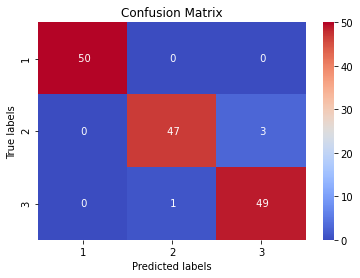

In [3]:
iris.drop("Unnamed: 0",axis=1,inplace=True)

def plot_confusion_matrix(y,y_predict):
 cm = confusion_matrix(y, y_predict)
 ax= plt.subplot()
 sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
 ax.set_xlabel('Predicted labels')
 ax.set_ylabel('True labels')
 ax.set_title('Confusion Matrix');
 ax.xaxis.set_ticklabels(['1','2','3']); ax.yaxis.set_ticklabels(['1','2','3'])


x=iris.drop('Class',axis=1)
Y=iris['Class']
loo = LeaveOneOut()
loo.get_n_splits(x)

x=np.array(x)
Y=np.array(Y)

true_label=[]
predicted_label=[]

svclassifier = SVC(kernel='linear')

for train_index, test_index in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    svclassifier.fit(x_train, Y_train)
    Y_pred = svclassifier.predict(x_test)
    true_label.extend(Y_test)
    predicted_label.extend(Y_pred)

plot_confusion_matrix(true_label,predicted_label)

#روش کار با لیو وان اوت: هر سری یکی از رکوردها را به عنوان تست و مابقی رکوردها را به عنوان داده ی آموزشی در نظر گرفتیم و براساس این داده های آموزشی یک مدل ساختیم 
#و توسط این مدل برای آن رکورد تست پیش بینی انجام دادیم. از طرف دیگر در یک آرایه هرسری این مفقدار پیش بینی شده را اینسرت کردیم و در یک آرایه متناظر دیگر مقدار درست و 
#واقعی مربوط به هر رکورد تست را هر سری اینسرت میکنیم . درنهایت با توجه به این دو ارایه ساخته شده ماترس را ساخته و بررسی میکنیم



#error rate=4/150=0.026
#با توجه به اینکه فقط 4 تا از رکوردها را اشتباها پیش بینی کرده است و ارور ریت پایینی دارد ینی این مدل خوب عمل کرده است و دقت بالایی دارد. 50 تا از رکوردها کلاس 1 بوده 
#که همگی را درست پیش بینی کرده است. 50 تا از رکوردها نیز کلاس 2 بوده که فقط 3 تا از انها اشتباه پیش بینی شده و 50 تا از رکوردها نیز کلاس 3 بوده که فقط یکی اشتباها
#پیش بینی شده

[0.04, 0.02666666666666667, 0.04666666666666667, 0.02666666666666667, 0.02666666666666667, 0.04666666666666667, 0.04, 0.05333333333333334, 0.06, 0.07333333333333333]


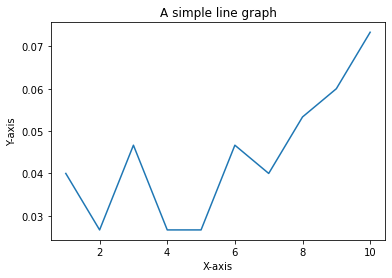

In [4]:
#part1
looo = LeaveOneOut()
looo.get_n_splits(x)

x=np.array(x)
Y=np.array(Y)


deg=np.arange(1,11)
error=[]

for i in np.arange(0,10):
    true_label1=[]
    predicted_label1=[]
    error_rate=[]
    svclassifier1 = SVC(kernel='poly', degree=deg[i])

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        svclassifier1.fit(x_train, Y_train)
        Y_pred = svclassifier1.predict(x_test)
        true_label1.extend(Y_test)
        predicted_label1.extend(Y_pred)
        error_rate.append(1 - accuracy_score(Y_test, Y_pred))
        
    error.append(np.mean(error_rate)) 

print(error)


plt.plot(deg,error)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("A simple line graph")
plt.show()

#نمودار در نقاط 2 و 4 و 5 مقدار مینیمم دارد. که یعنی مدل اس وی ام با درجات 2 و 4 و 5 کمترین نرخ خطا را داشته و بهینه میباشد

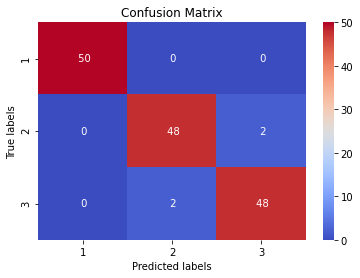

In [5]:
#part2

loo1 = LeaveOneOut()
loo1.get_n_splits(x)

x=np.array(x)
Y=np.array(Y)

true_label2=[]
predicted_label2=[]

svclassifier2 = SVC(kernel='poly', degree=5)

for train_index1, test_index1 in loo1.split(x):
    x_train, x_test = x[train_index1], x[test_index1]
    Y_train, Y_test = Y[train_index1], Y[test_index1]
    svclassifier2.fit(x_train, Y_train)
    pred_result = svclassifier2.predict(x_test)
    true_label2.extend(Y_test)
    predicted_label2.extend(pred_result)

plot_confusion_matrix(true_label2,predicted_label2)

#درجه بهینه 2 یا 4 یا 5 خواهد بود همان طور که در مرحله قبل مشاهده کردیم. که با هر کدام از این درجات مدل را پیاده سازی کرده و با توجه به ماتریس رسم شده 50 تا از رکوردها از کلاس یک بوده که 
#درست پیش بینی شده و 50 تا از رکورده ها از کلاس 2 بوده که 2 تای آنها اشتباها پیش بینی شده و 50 تای دیگر از کلاس 3 بوده که 2 تا از انها اشتباها پیش بینی شده
#پس ارور ریت همچنان 4/150 است و با حالت قبلی یکسان خواهد بود